### Load Packages

In [207]:
import numpy as np
from numpy.random import RandomState
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier



import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load Data

In [208]:
df = pd.concat([pd.read_csv('dataset/fraudTest.csv'),pd.read_csv('dataset/fraudTest.csv')], ignore_index=True)
df.drop('Unnamed: 0',axis=1,inplace=True) # unnecessary column
df.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


### Clean the Data

In [209]:
# Checking Null values
pd.DataFrame(df.isnull().value_counts())
# df.dropna(axis=0, how= 'all')
df.dropna(axis=0,how='any') #drop all rows that have any NaN values
print(df.)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111433,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1111434,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1111435,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1111436,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [210]:
# Binarizing Gender column
def gender_binarizer(x):
    if x=='F':
        return 1
    if x=='M':
        return 0
    
df['gender'] = df['gender'].transform(gender_binarizer)

In [211]:
# Seperating nominal from numeric
# Note:There are almost 2M records in dfz.In order to avoid the heavy calculation,only the first 100000 rows were selected.
df2 = df.loc[:99999,df.dtypes!=np.object]
# df2 = df.loc[:99999]

<ipython-input-211-b87a2be33ffb>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df2 = df.loc[:99999,df.dtypes!=np.object]


### Split Dataset

In [223]:
X = df2.drop(['cc_num','is_fraud','zip'],axis=1)
features = [column for column in X]

y = df2['is_fraud']
labels = ['0', '1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### SMOTE

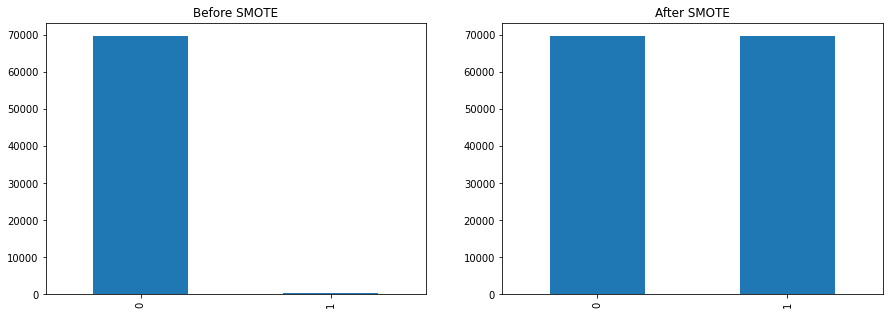

In [213]:
sm = SMOTE()
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

features = X_train.columns.values.tolist()

# to demonstrate the effect of SMOTE over imbalanced datasets
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before SMOTE')
pd.Series(y_train).value_counts().plot.bar(ax=ax1)

ax2.set_title('After SMOTE')  
pd.Series(y_train_new).value_counts().plot.bar(ax=ax2)

plt.show()

In [214]:
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

### Scaling

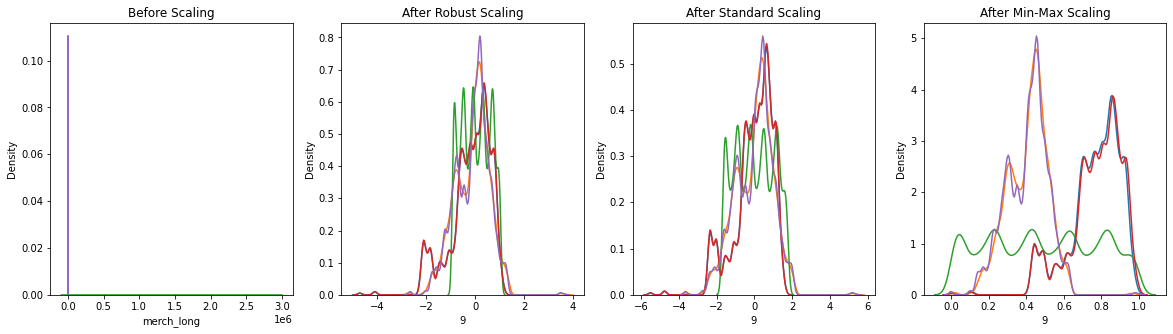

In [215]:
# to compare the effect of each scaler on our dataset
scaler = RobustScaler()
robust_df = scaler.fit_transform(df2)
robust_df = pd.DataFrame(robust_df)
  
scaler = StandardScaler()
standard_df = scaler.fit_transform(df2)
standard_df = pd.DataFrame(standard_df)
  
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(df2)
minmax_df = pd.DataFrame(minmax_df)

# using KDE plot
#Note: some columns are opted out in order to speed up the process
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df2['merch_long'], ax = ax1)
sns.kdeplot(df2['merch_lat'], ax = ax1)
sns.kdeplot(df2['city_pop'], ax = ax1)
sns.kdeplot(df2['long'], ax = ax1)
sns.kdeplot(df2['lat'], ax = ax1)


ax2.set_title('After Robust Scaling')  
sns.kdeplot(robust_df[9], ax = ax2)
sns.kdeplot(robust_df[8], ax = ax2)
sns.kdeplot(robust_df[7], ax = ax2)
sns.kdeplot(robust_df[5], ax = ax2)
sns.kdeplot(robust_df[4], ax = ax2)


ax3.set_title('After Standard Scaling')  
sns.kdeplot(standard_df[9], ax = ax3)
sns.kdeplot(standard_df[8], ax = ax3)
sns.kdeplot(standard_df[7], ax = ax3)
sns.kdeplot(standard_df[5], ax = ax3)
sns.kdeplot(standard_df[4], ax = ax3)


ax4.set_title('After Min-Max Scaling')  
sns.kdeplot(minmax_df[9], ax = ax4)
sns.kdeplot(minmax_df[8], ax = ax4)
sns.kdeplot(minmax_df[7], ax = ax4)
sns.kdeplot(minmax_df[5], ax = ax4)
sns.kdeplot(minmax_df[4], ax = ax4)

plt.show()

In [216]:
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Model Training and Selection

#### Decision Tree

In [217]:
print(features)
print(labels)

['amt', 'gender', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
['0', '1']


In [218]:
# decision_tree_classifier = DecisionTreeClassifier()
# decision_tree_classifier = DecisionTreeClassifier.fit(X_train, y_train)

decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train,y_train)
dtree_prediction = decision_tree_classifier.predict(X_test)
print(confusion_matrix(y_test,dtree_prediction))
print('\n')
print(classification_report(y_test,dtree_prediction))

[[29593   290]
 [   37    80]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     29883
           1       0.22      0.68      0.33       117

    accuracy                           0.99     30000
   macro avg       0.61      0.84      0.66     30000
weighted avg       1.00      0.99      0.99     30000



- Visualize the decision tree

In [219]:

import graphviz
from six import StringIO
import pydot
from sklearn import tree

dot_data = StringIO()
tree.export_graphviz(decision_tree_classifier, out_file=dot_data, 
                         # feature_names=iris.feature_names,
                         feature_names = features,  
                         # class_names=iris.target_names,  
                         class_names = labels,
                         filled=True, rounded=True,  
                         special_characters=True  
                    )
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("img/SDSS.pdf")
graph[0].write_svg("img/SDSS.svg")


#### Random Forset

In [159]:
rand_forests = RandomForestClassifier(n_estimators=200)
rand_forests = rand_forests.fit(X_train,y_train)
rand_forests_predict = rand_forests.predict(X_test)
print(confusion_matrix(y_test,rand_forests_predict))
print('\n')
print(classification_report(y_test,rfc_pred))

[[29780   103]
 [   31    86]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29883
           1       0.95      0.47      0.63       117

    accuracy                           1.00     30000
   macro avg       0.97      0.73      0.81     30000
weighted avg       1.00      1.00      1.00     30000



#### AdaBoost

In [100]:
adabc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
adabc.fit(X_train,y_train)
adabc_pred = adabc.predict(X_test)

print(confusion_matrix(y_test,adabc_pred))
print('\n')
print(classification_report(y_test,adabc_pred))

[[29875     8]
 [   72    45]]


#### Bagging

In [101]:
bgc = BaggingClassifier(DecisionTreeClassifier(),n_estimators=200)
bgc.fit(X_train,y_train)
bgc_pred = bgc.predict(X_test)

print(confusion_matrix(y_test,bgc_pred))

[[29870    13]
 [   67    50]]


#### Evaluation

- Calculate result table

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score



# Instantiate the classfiers and make a list
classifiers = [DecisionTreeClassifier(random_state=42),
               RandomForestClassifier(random_state=42),
               AdaBoostClassifier(random_state=42),
               BaggingClassifier(random_state=42)
              ]

# clssifiers = [a list of models]
# model必须要实现的接口：
    # fit(train_features, train_labels)
    #  predict_proba(train_features)

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
#     yptoba = model.predict(X_test)
#     print(yproba[0:10])
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

- Plot ROC curve

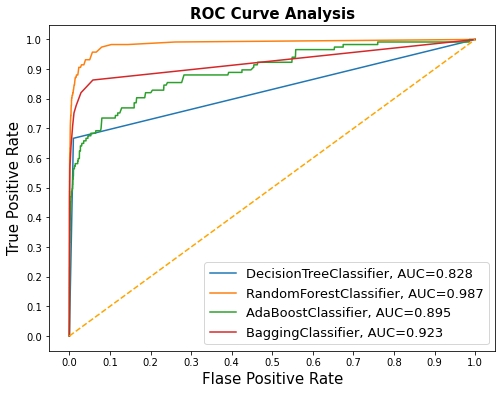

In [222]:
# Plotting ROC curve 

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [240]:
df_train = pd.read_csv('dataset/fraudTrain.csv')

df_test = pd.read_csv('dataset/fraudTest.csv')


In [267]:

df_train = df_train.loc[:10000000,df_train.dtypes!=np.object_]
df_test = df_test.loc[:10000000,df_test.dtypes!=np.object_]

X_train = df_train.drop(['Unnamed: 0','zip','cc_num','is_fraud','unix_time','city_pop'],axis=1)
y_train = df_train['is_fraud']

X_test = df_test.drop(['Unnamed: 0','zip','cc_num','is_fraud','unix_time','city_pop'],axis=1)
y_test = df_test['is_fraud']

In [268]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label = y_train ,enable_categorical=True)
dtest = xgb.DMatrix(X_test, label = y_test,enable_categorical=True)

param = {}
param['nthread'] = 4
param['eval_metric'] = 'auc'


evallist = [(dtest, 'eval'), (dtrain, 'train')]


num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-auc:0.94556	train-auc:0.94944
[1]	eval-auc:0.94708	train-auc:0.95109
[2]	eval-auc:0.94456	train-auc:0.95095
[3]	eval-auc:0.94997	train-auc:0.95523
[4]	eval-auc:0.95364	train-auc:0.95830
[5]	eval-auc:0.95358	train-auc:0.95834
[6]	eval-auc:0.95360	train-auc:0.95834
[7]	eval-auc:0.95386	train-auc:0.95885
[8]	eval-auc:0.95381	train-auc:0.95879
[9]	eval-auc:0.95386	train-auc:0.95885


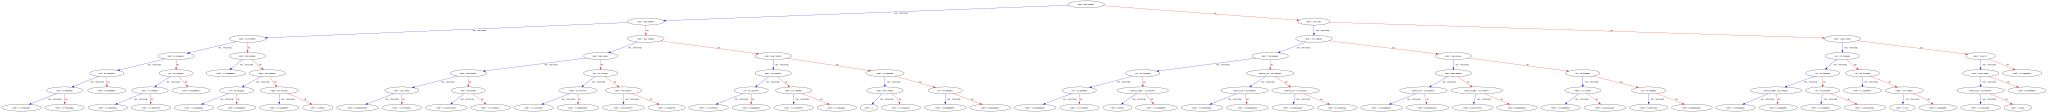

In [269]:
xgb.to_graphviz(bst)

### Use Pycaret to select model

In [1]:
import numpy as np
import pandas as pd
from pycaret.classification import *
df = pd.concat([pd.read_csv('dataset/fraudTest.csv'),pd.read_csv('dataset/fraudTest.csv')], ignore_index=True)
df.drop('Unnamed: 0',axis=1,inplace=True) # unnecessary column



In [2]:
features = [x for x in df.columns]
cate_features = []
num_features = []
for f in features:
    if type(df[f][0])==type("string"):
        cate_features.append(f)
    else:
        num_features.append(f)

print(features)
print(cate_features)
print(num_features)


['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']
['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']
['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


In [3]:
ignore_features = ['cc_num','zip','trans_date_trans_time','city','state','street','dob','merchant','first','last','trans_num','gender','merchant']
data_set = setup(data = df,categorical_features=cate_features, ignore_features = ignore_features, target = "is_fraud")

,Description,Value
0,session_id,3314
1,Target,is_fraud
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1111438, 22)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
models = ['knn','dt','lr','ada','xgboost','lightgbm','rf']
best_model = compare_models(include=models)

IntProgress(value=0, description='Processing: ', max=39)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:42:47
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)


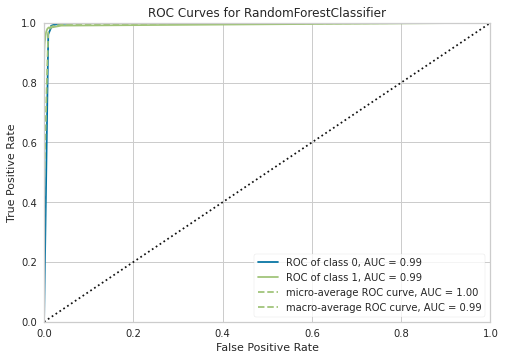

In [11]:
rf = create_model('rf')
plot_model(rf, plot = 'auc')
interpret_model(rf)

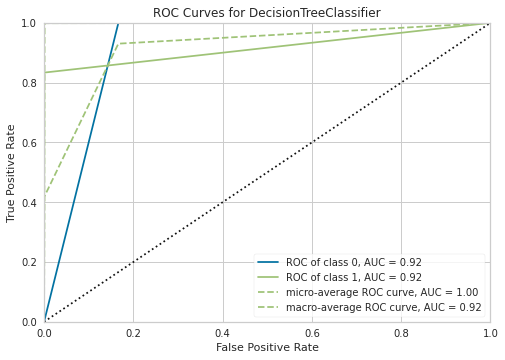

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


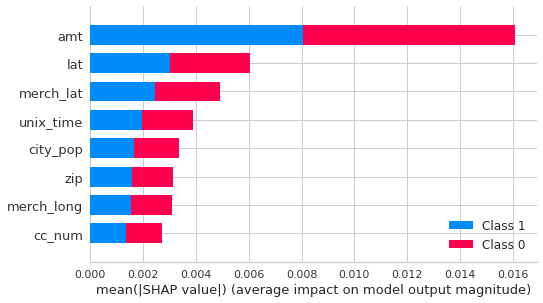

In [12]:
dt = create_model('dt')
plot_model(dt, plot = 'auc')
interpret_model(dt)